In [1]:
import os
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', None)

# Object Counts

In [2]:
with open("experiments/obj_counts.json", "r") as f:
    obj_counts = json.load(f)
obj_counts.keys()

dict_keys(['itsttime', 'twittnet', 'skltweet', 'betterxb', 'buildats', 'storesfg', 'ai4code', 'tpsmay22'])

In [3]:
def parse_box_plot_data(obj_counts):
    labels = sorted(obj_counts)
    all_data = [obj_counts[label] for label in labels]

    bp = plt.boxplot(all_data, labels=labels)
    plt.yscale('log')
    plt.close()
    rows_list = []

    for i in range(len(labels)):  # index label median box_top box_bottom whisker_top whisker_bottom
        dict1 = {}
        dict1['index_label'] = i
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        dict1['max'] = max(obj_counts[labels[i]])
        rows_list.append(dict1)
    # rows_list = sorted(rows_list, key=lambda row: -row['median'])
    rows_list = sorted(rows_list, key=lambda row: row['max'])

    return pd.DataFrame(rows_list)

In [4]:
obj_counts_df = parse_box_plot_data(obj_counts)
obj_counts_df

,index_label,label,lower_whisker,lower_quartile,median,upper_quartile,upper_whisker,max
0,2,buildats,843.0,1320.25,2027.5,4849.5,5072.0,5072
1,5,storesfg,67.0,24677.00,80290.0,82498.0,90339.0,90339
2,3,itsttime,751.0,1387.50,1516.0,132498.0,160936.0,160936
3,1,betterxb,175011.0,175272.25,175805.0,175829.0,175850.0,175850
4,4,skltweet,1218217.0,1262596.25,1352548.5,1534962.0,1551485.0,1551485
5,6,tpsmay22,1593315.0,1593386.00,1593508.0,1593856.0,1594264.0,1594264
6,7,twittnet,54.0,537477.00,537569.0,1315293.0,1657330.0,1657330
7,0,ai4code,19269909.0,19270560.00,19281434.0,20396989.0,20397220.0,20397220


In [5]:
obj_counts_df.to_csv("plots/numobjects.txt", index_label="index", sep=" ")

In [6]:
BOXPLOT_TEMPLATE = r"""
    \begin{tikzpicture}
    \begin{axis}[
        height=45mm,
        width=\linewidth,
        boxplot/draw direction=x,
        axis y line=left,
        axis x line=bottom,
        xmode=log,
        xmajorgrids,
        % xminorgrids,
        enlarge x limits,
        enlarge y limits,
        ytick=__XTICK__,
        yticklabels=__XTICKLABELS__,
    ]
    __ADD_PLOTS__
    \end{axis}
    \end{tikzpicture}"""
ADDPLOT_TEMPLATE = r"""
        \addplot+ [
            objcount,
            boxplot prepared={
                lower whisker=__LOWER_WHISKER__, lower quartile=__LOWER_QUARTILE__,
                median=__MEDIAN__,
                upper quartile=__UPPER_QUARTILE__, upper whisker=__UPPER_WHISKER__,
            },
        ] coordinates {};
"""

In [7]:
labels = obj_counts_df["label"].values
xtick = f"{{{', '.join(str(i+1) for i in range(len(obj_counts_df)))}}}"
xticklabels = f"{{{', '.join(labels)}}}"
addplots = "\n".join([
    ADDPLOT_TEMPLATE.replace("__LOWER_WHISKER__", str(row["lower_whisker"])).replace("__MEDIAN__", str(row["median"])).replace("__LOWER_QUARTILE__", str(row["lower_quartile"])).replace("__UPPER_QUARTILE__", str(row["upper_quartile"])).replace("__UPPER_WHISKER__", str(row["upper_whisker"]))
    for i, row in obj_counts_df.iterrows()
])
print(BOXPLOT_TEMPLATE.replace("__XTICK__", xtick).replace("__XTICKLABELS__", xticklabels).replace("__ADD_PLOTS__", addplots))


    \begin{tikzpicture}
    \begin{axis}[
        height=45mm,
        width=\linewidth,
        boxplot/draw direction=x,
        axis y line=left,
        axis x line=bottom,
        xmode=log,
        xmajorgrids,
        % xminorgrids,
        enlarge x limits,
        enlarge y limits,
        ytick={1, 2, 3, 4, 5, 6, 7, 8},
        yticklabels={buildats, storesfg, itsttime, betterxb, skltweet, tpsmay22, twittnet, ai4code},
    ]
    
        \addplot+ [
            objcount,
            boxplot prepared={
                lower whisker=843.0, lower quartile=1320.25,
                median=2027.5,
                upper quartile=4849.5, upper whisker=5072.0,
            },
        ] coordinates {};


        \addplot+ [
            objcount,
            boxplot prepared={
                lower whisker=67.0, lower quartile=24677.0,
                median=80290.0,
                upper quartile=82498.0, upper whisker=90339.0,
            },
        ] coordinates {};


        \addplo

# Exp I: pga vs. snp

In [8]:
result_dir = "yj8result"

In [9]:
all_nb_paths = {
    "ai4code":{
        "pga": f"{result_dir}/exp1_pga_ai4code/expstat.json",
        "snp": f"{result_dir}/exp1_snp_ai4code/expstat.json",
        "dill": f"{result_dir}/exp1_dill_ai4code/expstat.json",
        "shev": f"{result_dir}/exp1_shev_ai4code/expstat.json",
        "zodb": f"{result_dir}/exp1_zodb_ai4code/expstat.json",
        "zosp": f"{result_dir}/exp1_zosp_ai4code/expstat.json",
        "pgcache4": f"{result_dir}/exp1_pgcache4_ai4code/expstat.json",
        "pgcache16": f"{result_dir}/exp1_pgcache16_ai4code/expstat.json",
        "pgcache64": f"{result_dir}/exp1_pgcache64_ai4code/expstat.json",
        "pgcache256": f"{result_dir}/exp1_pgcache256_ai4code/expstat.json",
        "pgcache1024": f"{result_dir}/exp1_pgcache1024_ai4code/expstat.json",
        "pgcache4096": f"{result_dir}/exp1_pgcache4096_ai4code/expstat.json",
        "pgcache16384": f"{result_dir}/exp1_pgcache16384_ai4code/expstat.json",
        "pgcache65536": f"{result_dir}/exp1_pgcache65536_ai4code/expstat.json",
        "pgcache262144": f"{result_dir}/exp1_pgcache262144_ai4code/expstat.json",
        "pgcache1048576": f"{result_dir}/exp1_pgcache1048576_ai4code/expstat.json",
        "pgcache0": f"{result_dir}/exp1_pgcache0_ai4code/expstat.json",
        "pgcache1m": f"{result_dir}/exp1_pgcache1m_ai4code/expstat.json",
        "pgcache15m": f"{result_dir}/exp1_pgcache15m_ai4code/expstat.json",
        "pgcache31m": f"{result_dir}/exp1_pgcache31m_ai4code/expstat.json",
        "pgcache62m": f"{result_dir}/exp1_pgcache62m_ai4code/expstat.json",
        "pgcache125m": f"{result_dir}/exp1_pgcache125m_ai4code/expstat.json",
        "pgcache250m": f"{result_dir}/exp1_pgcache250m_ai4code/expstat.json",
        "pgcache500m": f"{result_dir}/exp1_pgcache500m_ai4code/expstat.json",
        "pgcache1g": f"{result_dir}/exp1_pgcache1g_ai4code/expstat.json",
        "pgcache2g": f"{result_dir}/exp1_pgcache2g_ai4code/expstat.json",
        "pgcache4g": f"{result_dir}/exp1_pgcache4g_ai4code/expstat.json",
        "pgcache8g": f"{result_dir}/exp1_pgcache8g_ai4code/expstat.json",
        "pgcache10g": f"{result_dir}/exp1_pgcache10g_ai4code/expstat.json",
        "pgcache16g": f"{result_dir}/exp1_pgcache16g_ai4code/expstat.json",
        "pgcache100g": f"{result_dir}/exp1_pgcache100g_ai4code/expstat.json",
        "pgnoavf": f"{result_dir}/exp1_pgnoavf_ai4code/expstat.json",
        "pgcache0noavf": f"{result_dir}/exp1_pgcache0noavf_ai4code/expstat.json",
        "prand": f"{result_dir}/exp1_prand_ai4code/expstat.json",
        # "pnv": f"{result_dir}/exp1_pnv_ai4code/expstat.json",
        "pnb": f"{result_dir}/exp1_pnb_ai4code/expstat.json",
        "pfl": f"{result_dir}/exp1_pfl_ai4code/expstat.json",
        "pg0": f"{result_dir}/exp1_pg0_ai4code/expstat.json",
        "pg1": f"{result_dir}/exp1_pg1_ai4code/expstat.json",
        "pgl": f"{result_dir}/exp1_pgl_ai4code/expstat.json",
        "pgnostatic": f"{result_dir}/exp1_pgnostatic_ai4code/expstat.json",
        "pgnoavl": f"{result_dir}/exp1_pgnoavl_ai4code/expstat.json",
        "pgnoavlstatic": f"{result_dir}/exp1_pgnoavlstatic_ai4code/expstat.json",
        "pglnoavlstatic": f"{result_dir}/exp1_pglnoavlstatic_ai4code/expstat.json",
        "pglnostatic": f"{result_dir}/exp1_pglnostatic_ai4code/expstat.json",
    },
    "tpsmay22":{
        "pga": f"{result_dir}/exp1_pga_tpsmay22/expstat.json",
        "snp": f"{result_dir}/exp1_snp_tpsmay22/expstat.json",
        "dill": f"{result_dir}/exp1_dill_tpsmay22/expstat.json",
        "shev": f"{result_dir}/exp1_shev_tpsmay22/expstat.json",
        "zodb": f"{result_dir}/exp1_zodb_tpsmay22/expstat.json",
        "zosp": f"{result_dir}/exp1_zosp_tpsmay22/expstat.json",
        "pgcache4": f"{result_dir}/exp1_pgcache4_tpsmay22/expstat.json",
        "pgcache16": f"{result_dir}/exp1_pgcache16_tpsmay22/expstat.json",
        "pgcache64": f"{result_dir}/exp1_pgcache64_tpsmay22/expstat.json",
        "pgcache256": f"{result_dir}/exp1_pgcache256_tpsmay22/expstat.json",
        "pgcache1024": f"{result_dir}/exp1_pgcache1024_tpsmay22/expstat.json",
        "pgcache4096": f"{result_dir}/exp1_pgcache4096_tpsmay22/expstat.json",
        "pgcache16384": f"{result_dir}/exp1_pgcache16384_tpsmay22/expstat.json",
        "pgcache65536": f"{result_dir}/exp1_pgcache65536_tpsmay22/expstat.json",
        "pgcache262144": f"{result_dir}/exp1_pgcache262144_tpsmay22/expstat.json",
        "pgcache1048576": f"{result_dir}/exp1_pgcache1048576_tpsmay22/expstat.json",
        "pgcache0": f"{result_dir}/exp1_pgcache0_tpsmay22/expstat.json",
        "pgcache1m": f"{result_dir}/exp1_pgcache1m_tpsmay22/expstat.json",
        "pgcache15m": f"{result_dir}/exp1_pgcache15m_tpsmay22/expstat.json",
        "pgcache31m": f"{result_dir}/exp1_pgcache31m_tpsmay22/expstat.json",
        "pgcache62m": f"{result_dir}/exp1_pgcache62m_tpsmay22/expstat.json",
        "pgcache125m": f"{result_dir}/exp1_pgcache125m_tpsmay22/expstat.json",
        "pgcache250m": f"{result_dir}/exp1_pgcache250m_tpsmay22/expstat.json",
        "pgcache500m": f"{result_dir}/exp1_pgcache500m_tpsmay22/expstat.json",
        "pgcache1g": f"{result_dir}/exp1_pgcache1g_tpsmay22/expstat.json",
        "pgcache2g": f"{result_dir}/exp1_pgcache2g_tpsmay22/expstat.json",
        "pgcache4g": f"{result_dir}/exp1_pgcache4g_tpsmay22/expstat.json",
        "pgcache8g": f"{result_dir}/exp1_pgcache8g_tpsmay22/expstat.json",
        "pgcache10g": f"{result_dir}/exp1_pgcache10g_tpsmay22/expstat.json",
        "pgcache16g": f"{result_dir}/exp1_pgcache16g_tpsmay22/expstat.json",
        "pgcache100g": f"{result_dir}/exp1_pgcache100g_tpsmay22/expstat.json",
        "pgnoavf": f"{result_dir}/exp1_pgnoavf_tpsmay22/expstat.json",
        "pgcache0noavf": f"{result_dir}/exp1_pgcache0noavf_tpsmay22/expstat.json",
        "prand": f"{result_dir}/exp1_prand_tpsmay22/expstat.json",
        "pnv": f"{result_dir}/exp1_pnv_tpsmay22/expstat.json",
        "pnb": f"{result_dir}/exp1_pnb_tpsmay22/expstat.json",
        "pfl": f"{result_dir}/exp1_pfl_tpsmay22/expstat.json",
        "pg0": f"{result_dir}/exp1_pg0_tpsmay22/expstat.json",
        "pg1": f"{result_dir}/exp1_pg1_tpsmay22/expstat.json",
        "pgl": f"{result_dir}/exp1_pgl_tpsmay22/expstat.json",
        "pgnostatic": f"{result_dir}/exp1_pgnostatic_tpsmay22/expstat.json",
        "pgnoavl": f"{result_dir}/exp1_pgnoavl_tpsmay22/expstat.json",
        "pgnoavlstatic": f"{result_dir}/exp1_pgnoavlstatic_tpsmay22/expstat.json",
        "pglnoavlstatic": f"{result_dir}/exp1_pglnoavlstatic_tpsmay22/expstat.json",
        "pglnostatic": f"{result_dir}/exp1_pglnostatic_tpsmay22/expstat.json",
    },
    "betterxb":{
        "pga": f"{result_dir}/exp1_pga_betterxb/expstat.json",
        "snp": f"{result_dir}/exp1_snp_betterxb/expstat.json",
        "dill": f"{result_dir}/exp1_dill_betterxb/expstat.json",
        "shev": f"{result_dir}/exp1_shev_betterxb/expstat.json",
        "zodb": f"{result_dir}/exp1_zodb_betterxb/expstat.json",
        "zosp": f"{result_dir}/exp1_zosp_betterxb/expstat.json",
        "pgcache4": f"{result_dir}/exp1_pgcache4_betterxb/expstat.json",
        "pgcache16": f"{result_dir}/exp1_pgcache16_betterxb/expstat.json",
        "pgcache64": f"{result_dir}/exp1_pgcache64_betterxb/expstat.json",
        "pgcache256": f"{result_dir}/exp1_pgcache256_betterxb/expstat.json",
        "pgcache1024": f"{result_dir}/exp1_pgcache1024_betterxb/expstat.json",
        "pgcache4096": f"{result_dir}/exp1_pgcache4096_betterxb/expstat.json",
        "pgcache16384": f"{result_dir}/exp1_pgcache16384_betterxb/expstat.json",
        "pgcache65536": f"{result_dir}/exp1_pgcache65536_betterxb/expstat.json",
        "pgcache262144": f"{result_dir}/exp1_pgcache262144_betterxb/expstat.json",
        "pgcache1048576": f"{result_dir}/exp1_pgcache1048576_betterxb/expstat.json",
        "pgcache0": f"{result_dir}/exp1_pgcache0_betterxb/expstat.json",
        "pgcache1m": f"{result_dir}/exp1_pgcache1m_betterxb/expstat.json",
        "pgcache15m": f"{result_dir}/exp1_pgcache15m_betterxb/expstat.json",
        "pgcache31m": f"{result_dir}/exp1_pgcache31m_betterxb/expstat.json",
        "pgcache62m": f"{result_dir}/exp1_pgcache62m_betterxb/expstat.json",
        "pgcache125m": f"{result_dir}/exp1_pgcache125m_betterxb/expstat.json",
        "pgcache250m": f"{result_dir}/exp1_pgcache250m_betterxb/expstat.json",
        "pgcache500m": f"{result_dir}/exp1_pgcache500m_betterxb/expstat.json",
        "pgcache1g": f"{result_dir}/exp1_pgcache1g_betterxb/expstat.json",
        "pgcache2g": f"{result_dir}/exp1_pgcache2g_betterxb/expstat.json",
        "pgcache4g": f"{result_dir}/exp1_pgcache4g_betterxb/expstat.json",
        "pgcache8g": f"{result_dir}/exp1_pgcache8g_betterxb/expstat.json",
        "pgcache10g": f"{result_dir}/exp1_pgcache10g_betterxb/expstat.json",
        "pgcache16g": f"{result_dir}/exp1_pgcache16g_betterxb/expstat.json",
        "pgcache100g": f"{result_dir}/exp1_pgcache100g_betterxb/expstat.json",
        "pgnoavf": f"{result_dir}/exp1_pgnoavf_betterxb/expstat.json",
        "pgcache0noavf": f"{result_dir}/exp1_pgcache0noavf_betterxb/expstat.json",
        "prand": f"{result_dir}/exp1_prand_betterxb/expstat.json",
        "pnv": f"{result_dir}/exp1_pnv_betterxb/expstat.json",
        "pnb": f"{result_dir}/exp1_pnb_betterxb/expstat.json",
        "pfl": f"{result_dir}/exp1_pfl_betterxb/expstat.json",
        "pg0": f"{result_dir}/exp1_pg0_betterxb/expstat.json",
        "pg1": f"{result_dir}/exp1_pg1_betterxb/expstat.json",
        "pgl": f"{result_dir}/exp1_pgl_betterxb/expstat.json",
        "pgnostatic": f"{result_dir}/exp1_pgnostatic_betterxb/expstat.json",
        "pgnoavl": f"{result_dir}/exp1_pgnoavl_betterxb/expstat.json",
        "pgnoavlstatic": f"{result_dir}/exp1_pgnoavlstatic_betterxb/expstat.json",
        "pglnoavlstatic": f"{result_dir}/exp1_pglnoavlstatic_betterxb/expstat.json",
        "pglnostatic": f"{result_dir}/exp1_pglnostatic_betterxb/expstat.json",
    },
    "skltweet":{
        "pga": f"{result_dir}/exp1_pga_skltweet/expstat.json",
        "snp": f"{result_dir}/exp1_snp_skltweet/expstat.json",
        "dill": f"{result_dir}/exp1_dill_skltweet/expstat.json",
        "shev": f"{result_dir}/exp1_shev_skltweet/expstat.json",
        "zodb": f"{result_dir}/exp1_zodb_skltweet/expstat.json",
        "zosp": f"{result_dir}/exp1_zosp_skltweet/expstat.json",
        "pgcache4": f"{result_dir}/exp1_pgcache4_skltweet/expstat.json",
        "pgcache16": f"{result_dir}/exp1_pgcache16_skltweet/expstat.json",
        "pgcache64": f"{result_dir}/exp1_pgcache64_skltweet/expstat.json",
        "pgcache256": f"{result_dir}/exp1_pgcache256_skltweet/expstat.json",
        "pgcache1024": f"{result_dir}/exp1_pgcache1024_skltweet/expstat.json",
        "pgcache4096": f"{result_dir}/exp1_pgcache4096_skltweet/expstat.json",
        "pgcache16384": f"{result_dir}/exp1_pgcache16384_skltweet/expstat.json",
        "pgcache65536": f"{result_dir}/exp1_pgcache65536_skltweet/expstat.json",
        "pgcache262144": f"{result_dir}/exp1_pgcache262144_skltweet/expstat.json",
        "pgcache1048576": f"{result_dir}/exp1_pgcache1048576_skltweet/expstat.json",
        "pgcache0": f"{result_dir}/exp1_pgcache0_skltweet/expstat.json",
        "pgcache1m": f"{result_dir}/exp1_pgcache1m_skltweet/expstat.json",
        "pgcache15m": f"{result_dir}/exp1_pgcache15m_skltweet/expstat.json",
        "pgcache31m": f"{result_dir}/exp1_pgcache31m_skltweet/expstat.json",
        "pgcache62m": f"{result_dir}/exp1_pgcache62m_skltweet/expstat.json",
        "pgcache125m": f"{result_dir}/exp1_pgcache125m_skltweet/expstat.json",
        "pgcache250m": f"{result_dir}/exp1_pgcache250m_skltweet/expstat.json",
        "pgcache500m": f"{result_dir}/exp1_pgcache500m_skltweet/expstat.json",
        "pgcache1g": f"{result_dir}/exp1_pgcache1g_skltweet/expstat.json",
        "pgcache2g": f"{result_dir}/exp1_pgcache2g_skltweet/expstat.json",
        "pgcache4g": f"{result_dir}/exp1_pgcache4g_skltweet/expstat.json",
        "pgcache8g": f"{result_dir}/exp1_pgcache8g_skltweet/expstat.json",
        "pgcache10g": f"{result_dir}/exp1_pgcache10g_skltweet/expstat.json",
        "pgcache16g": f"{result_dir}/exp1_pgcache16g_skltweet/expstat.json",
        "pgcache100g": f"{result_dir}/exp1_pgcache100g_skltweet/expstat.json",
        "pgnoavf": f"{result_dir}/exp1_pgnoavf_skltweet/expstat.json",
        "pgcache0noavf": f"{result_dir}/exp1_pgcache0noavf_skltweet/expstat.json",
        "prand": f"{result_dir}/exp1_prand_skltweet/expstat.json",
        "pnv": f"{result_dir}/exp1_pnv_skltweet/expstat.json",
        "pnb": f"{result_dir}/exp1_pnb_skltweet/expstat.json",
        "pfl": f"{result_dir}/exp1_pfl_skltweet/expstat.json",
        "pg0": f"{result_dir}/exp1_pg0_skltweet/expstat.json",
        "pg1": f"{result_dir}/exp1_pg1_skltweet/expstat.json",
        "pgl": f"{result_dir}/exp1_pgl_skltweet/expstat.json",
        "pgnostatic": f"{result_dir}/exp1_pgnostatic_skltweet/expstat.json",
        "pgnoavl": f"{result_dir}/exp1_pgnoavl_skltweet/expstat.json",
        "pgnoavlstatic": f"{result_dir}/exp1_pgnoavlstatic_skltweet/expstat.json",
        "pglnoavlstatic": f"{result_dir}/exp1_pglnoavlstatic_skltweet/expstat.json",
        "pglnostatic": f"{result_dir}/exp1_pglnostatic_skltweet/expstat.json",
    },
    "twittnet":{
        "pga": f"{result_dir}/exp1_pga_twittnet/expstat.json",
        "snp": f"{result_dir}/exp1_snp_twittnet/expstat.json",
        "dill": f"{result_dir}/exp1_dill_twittnet/expstat.json",
        "shev": f"{result_dir}/exp1_shev_twittnet/expstat.json",
        "zodb": f"{result_dir}/exp1_zodb_twittnet/expstat.json",
        "zosp": f"{result_dir}/exp1_zosp_twittnet/expstat.json",
        "pgcache4": f"{result_dir}/exp1_pgcache4_twittnet/expstat.json",
        "pgcache16": f"{result_dir}/exp1_pgcache16_twittnet/expstat.json",
        "pgcache64": f"{result_dir}/exp1_pgcache64_twittnet/expstat.json",
        "pgcache256": f"{result_dir}/exp1_pgcache256_twittnet/expstat.json",
        "pgcache1024": f"{result_dir}/exp1_pgcache1024_twittnet/expstat.json",
        "pgcache4096": f"{result_dir}/exp1_pgcache4096_twittnet/expstat.json",
        "pgcache16384": f"{result_dir}/exp1_pgcache16384_twittnet/expstat.json",
        "pgcache65536": f"{result_dir}/exp1_pgcache65536_twittnet/expstat.json",
        "pgcache262144": f"{result_dir}/exp1_pgcache262144_twittnet/expstat.json",
        "pgcache1048576": f"{result_dir}/exp1_pgcache1048576_twittnet/expstat.json",
        "pgcache0": f"{result_dir}/exp1_pgcache0_twittnet/expstat.json",
        "pgcache1m": f"{result_dir}/exp1_pgcache1m_twittnet/expstat.json",
        "pgcache15m": f"{result_dir}/exp1_pgcache15m_twittnet/expstat.json",
        "pgcache31m": f"{result_dir}/exp1_pgcache31m_twittnet/expstat.json",
        "pgcache62m": f"{result_dir}/exp1_pgcache62m_twittnet/expstat.json",
        "pgcache125m": f"{result_dir}/exp1_pgcache125m_twittnet/expstat.json",
        "pgcache250m": f"{result_dir}/exp1_pgcache250m_twittnet/expstat.json",
        "pgcache500m": f"{result_dir}/exp1_pgcache500m_twittnet/expstat.json",
        "pgcache1g": f"{result_dir}/exp1_pgcache1g_twittnet/expstat.json",
        "pgcache2g": f"{result_dir}/exp1_pgcache2g_twittnet/expstat.json",
        "pgcache4g": f"{result_dir}/exp1_pgcache4g_twittnet/expstat.json",
        "pgcache8g": f"{result_dir}/exp1_pgcache8g_twittnet/expstat.json",
        "pgcache10g": f"{result_dir}/exp1_pgcache10g_twittnet/expstat.json",
        "pgcache16g": f"{result_dir}/exp1_pgcache16g_twittnet/expstat.json",
        "pgcache100g": f"{result_dir}/exp1_pgcache100g_twittnet/expstat.json",
        "pgnoavf": f"{result_dir}/exp1_pgnoavf_twittnet/expstat.json",
        "pgcache0noavf": f"{result_dir}/exp1_pgcache0noavf_twittnet/expstat.json",
        # "prand": f"{result_dir}/exp1_prand_twittnet/expstat.json",
        "pnv": f"{result_dir}/exp1_pnv_twittnet/expstat.json",
        "pnb": f"{result_dir}/exp1_pnb_twittnet/expstat.json",
        "pfl": f"{result_dir}/exp1_pfl_twittnet/expstat.json",
        "pg0": f"{result_dir}/exp1_pg0_twittnet/expstat.json",
        "pg1": f"{result_dir}/exp1_pg1_twittnet/expstat.json",
        "pgl": f"{result_dir}/exp1_pgl_twittnet/expstat.json",
        "pgnostatic": f"{result_dir}/exp1_pgnostatic_twittnet/expstat.json",
        "pgnoavl": f"{result_dir}/exp1_pgnoavl_twittnet/expstat.json",
        "pgnoavlstatic": f"{result_dir}/exp1_pgnoavlstatic_twittnet/expstat.json",
        "pglnoavlstatic": f"{result_dir}/exp1_pglnoavlstatic_twittnet/expstat.json",
        "pglnostatic": f"{result_dir}/exp1_pglnostatic_twittnet/expstat.json",
    },
}

In [10]:
def read_result(nb_path):
    with open(nb_path, "r") as f:
        return json.load(f)

def parse_result(nb_path):
    result = read_result(nb_path)
    total_lock_time = sum(result["lock_times"])
    total_join_time = sum(result["join_times"])
    total_dump_time = sum(stat["time_s"] for stat in result["dumps"])
    load_times = [stat["time_s"] for stat in result["loads"]]
    return {
        "storage_gb": max(dump["storage_b"] / 1e9 for dump in result["dumps"]),
        "sum_save_s": total_lock_time + total_dump_time,  # join already included in dump
        "avg_save_s": (total_lock_time + total_dump_time) / len(result["dumps"]),  # join already included in dump
        "median_load_s": np.median(load_times),  # load
    }

def parse_nb(nb_paths, baseline):
    results = {}
    for sut in [baseline, *list(nb_paths)]:
        nb_path = nb_paths[sut]
        result = parse_result(nb_path)
        for key in list(result):
            rel_val = results[f"{baseline}_{key}"] / result[key] if sut != baseline else 1.0
            result[f"rel_{key}"] = (
                (f"{round(rel_val, ndigits=1)}" + r"$\times$")
                if rel_val > 1.0
                else (f"{round(rel_val, ndigits=2)}" + r"$\times$")
            )
        for k, v in result.items():
            results[f"{sut}_{k}"] = v
    return results

def parse_all_nbs(all_nb_paths, baseline):
    return {nb: parse_nb(nb_paths, baseline) for nb, nb_paths in all_nb_paths.items()}

all_results = parse_all_nbs(all_nb_paths, baseline="snp")

/Users/mixs/Documents/research/ttvl/pod/.venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/mixs/Documents/research/ttvl/pod/.venv/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [11]:
nbs = ['betterxb', 'skltweet', 'tpsmay22', 'twittnet', 'ai4code']

def extract_less(suts, baseline):
    nb_paths = {nb: {sut: all_nb_paths[nb][sut] for sut in suts if sut in all_nb_paths[nb]} for nb in all_nb_paths}
    all_results = parse_all_nbs(all_nb_paths, baseline=baseline)
    return pd.DataFrame([{
        "nb": nb,
        **all_results[nb],
    } for nb in nbs])


exp_i_df = extract_less(list(all_nb_paths['ai4code']), baseline="snp")
exp_i_df

,nb,snp_storage_gb,snp_sum_save_s,snp_avg_save_s,snp_median_load_s,snp_rel_storage_gb,snp_rel_sum_save_s,snp_rel_avg_save_s,snp_rel_median_load_s,pga_storage_gb,pga_sum_save_s,pga_avg_save_s,pga_median_load_s,pga_rel_storage_gb,pga_rel_sum_save_s,pga_rel_avg_save_s,pga_rel_median_load_s,dill_storage_gb,dill_sum_save_s,dill_avg_save_s,dill_median_load_s,dill_rel_storage_gb,dill_rel_sum_save_s,dill_rel_avg_save_s,dill_rel_median_load_s,shev_storage_gb,shev_sum_save_s,shev_avg_save_s,shev_median_load_s,shev_rel_storage_gb,shev_rel_sum_save_s,shev_rel_avg_save_s,shev_rel_median_load_s,zodb_storage_gb,zodb_sum_save_s,zodb_avg_save_s,zodb_median_load_s,zodb_rel_storage_gb,zodb_rel_sum_save_s,zodb_rel_avg_save_s,zodb_rel_median_load_s,zosp_storage_gb,zosp_sum_save_s,zosp_avg_save_s,zosp_median_load_s,zosp_rel_storage_gb,zosp_rel_sum_save_s,zosp_rel_avg_save_s,zosp_rel_median_load_s,pgcache4_storage_gb,pgcache4_sum_save_s,pgcache4_avg_save_s,pgcache4_median_load_s,pgcache4_rel_storage_gb,pgcache4_rel_sum_save_s,pgcache4_rel_avg_save_s,pgcache4_rel_median_load_s,pgcache16_storage_gb,pgcache16_sum_save_s,pgcache16_avg_save_s,pgcache16_median_load_s,pgcache16_rel_storage_gb,pgcache16_rel_sum_save_s,pgcache16_rel_avg_save_s,pgcache16_rel_median_load_s,pgcache64_storage_gb,pgcache64_sum_save_s,pgcache64_avg_save_s,pgcache64_median_load_s,pgcache64_rel_storage_gb,pgcache64_rel_sum_save_s,pgcache64_rel_avg_save_s,pgcache64_rel_median_load_s,pgcache256_storage_gb,pgcache256_sum_save_s,pgcache256_avg_save_s,pgcache256_median_load_s,pgcache256_rel_storage_gb,pgcache256_rel_sum_save_s,pgcache256_rel_avg_save_s,pgcache256_rel_median_load_s,pgcache1024_storage_gb,pgcache1024_sum_save_s,pgcache1024_avg_save_s,pgcache1024_median_load_s,pgcache1024_rel_storage_gb,pgcache1024_rel_sum_save_s,pgcache1024_rel_avg_save_s,pgcache1024_rel_median_load_s,pgcache4096_storage_gb,pgcache4096_sum_save_s,pgcache4096_avg_save_s,pgcache4096_median_load_s,pgcache4096_rel_storage_gb,pgcache4096_rel_sum_save_s,pgcache4096_rel_avg_save_s,pgcache4096_rel_median_load_s,pgcache16384_storage_gb,pgcache16384_sum_save_s,pgcache16384_avg_save_s,pgcache16384_median_load_s,pgcache16384_rel_storage_gb,pgcache16384_rel_sum_save_s,pgcache16384_rel_avg_save_s,pgcache16384_rel_median_load_s,pgcache65536_storage_gb,pgcache65536_sum_save_s,pgcache65536_avg_save_s,pgcache65536_median_load_s,pgcache65536_rel_storage_gb,pgcache65536_rel_sum_save_s,pgcache65536_rel_avg_save_s,pgcache65536_rel_median_load_s,pgcache262144_storage_gb,pgcache262144_sum_save_s,pgcache262144_avg_save_s,pgcache262144_median_load_s,pgcache262144_rel_storage_gb,pgcache262144_rel_sum_save_s,pgcache262144_rel_avg_save_s,pgcache262144_rel_median_load_s,pgcache1048576_storage_gb,pgcache1048576_sum_save_s,pgcache1048576_avg_save_s,pgcache1048576_median_load_s,pgcache1048576_rel_storage_gb,pgcache1048576_rel_sum_save_s,pgcache1048576_rel_avg_save_s,pgcache1048576_rel_median_load_s,pgcache0_storage_gb,pgcache0_sum_save_s,pgcache0_avg_save_s,pgcache0_median_load_s,pgcache0_rel_storage_gb,pgcache0_rel_sum_save_s,pgcache0_rel_avg_save_s,pgcache0_rel_median_load_s,pgcache1m_storage_gb,pgcache1m_sum_save_s,pgcache1m_avg_save_s,pgcache1m_median_load_s,pgcache1m_rel_storage_gb,pgcache1m_rel_sum_save_s,pgcache1m_rel_avg_save_s,pgcache1m_rel_median_load_s,pgcache15m_storage_gb,pgcache15m_sum_save_s,pgcache15m_avg_save_s,pgcache15m_median_load_s,pgcache15m_rel_storage_gb,pgcache15m_rel_sum_save_s,pgcache15m_rel_avg_save_s,pgcache15m_rel_median_load_s,pgcache31m_storage_gb,pgcache31m_sum_save_s,pgcache31m_avg_save_s,pgcache31m_median_load_s,pgcache31m_rel_storage_gb,pgcache31m_rel_sum_save_s,pgcache31m_rel_avg_save_s,pgcache31m_rel_median_load_s,pgcache62m_storage_gb,pgcache62m_sum_save_s,pgcache62m_avg_save_s,pgcache62m_median_load_s,pgcache62m_rel_storage_gb,pgcache62m_rel_sum_save_s,pgcache62m_rel_avg_save_s,pgcache62m_rel_median_load_s,pgcache125m_storage_gb,pgcache125m_sum_save_s,pgcache125m_avg_save_s,pgcache125m_median_load_s

In [12]:
exp_i_df.to_csv("plots/exp_i.txt", index_label="index", sep=" ", na_rep='nan')

In [13]:
exp_i_df.pg0_sum_save_s / exp_i_df.pga_sum_save_s, exp_i_df.pg1_sum_save_s / exp_i_df.pga_sum_save_s

(0    1.223741
 1    1.487192
 2    1.332874
 3    1.039554
 4    1.576046
 dtype: float64,
 0    1.206275
 1    1.488799
 2    1.352235
 3    1.025679
 4    1.614526
 dtype: float64)

In [14]:
!cat "plots/exp_i.txt"

index nb snp_storage_gb snp_sum_save_s snp_avg_save_s snp_median_load_s snp_rel_storage_gb snp_rel_sum_save_s snp_rel_avg_save_s snp_rel_median_load_s pga_storage_gb pga_sum_save_s pga_avg_save_s pga_median_load_s pga_rel_storage_gb pga_rel_sum_save_s pga_rel_avg_save_s pga_rel_median_load_s dill_storage_gb dill_sum_save_s dill_avg_save_s dill_median_load_s dill_rel_storage_gb dill_rel_sum_save_s dill_rel_avg_save_s dill_rel_median_load_s shev_storage_gb shev_sum_save_s shev_avg_save_s shev_median_load_s shev_rel_storage_gb shev_rel_sum_save_s shev_rel_avg_save_s shev_rel_median_load_s zodb_storage_gb zodb_sum_save_s zodb_avg_save_s zodb_median_load_s zodb_rel_storage_gb zodb_rel_sum_save_s zodb_rel_avg_save_s zodb_rel_median_load_s zosp_storage_gb zosp_sum_save_s zosp_avg_save_s zosp_median_load_s zosp_rel_storage_gb zosp_rel_sum_save_s zosp_rel_avg_save_s zosp_rel_median_load_s pgcache4_storage_gb pgcache4_sum_save_s pgcache4_avg_save_s pgcache4_median_load_s pgcache4_rel_storage_gb 

## CD, AVF, Async, ASCC

In [15]:
exp_ii_df = extract_less(["pgcache0noavf", "pgnoavf", "pgcache0", "pga"], baseline="pgcache0noavf")
display(exp_ii_df)
exp_iv_df = extract_less(["pgnoavlstatic", "pgnostatic", "pgnoavl", "pga"], baseline="pgnoavlstatic")
display(exp_iv_df)

/Users/mixs/Documents/research/ttvl/pod/.venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/mixs/Documents/research/ttvl/pod/.venv/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,nb,pgcache0noavf_storage_gb,pgcache0noavf_sum_save_s,pgcache0noavf_avg_save_s,pgcache0noavf_median_load_s,pgcache0noavf_rel_storage_gb,pgcache0noavf_rel_sum_save_s,pgcache0noavf_rel_avg_save_s,pgcache0noavf_rel_median_load_s,pga_storage_gb,pga_sum_save_s,pga_avg_save_s,pga_median_load_s,pga_rel_storage_gb,pga_rel_sum_save_s,pga_rel_avg_save_s,pga_rel_median_load_s,snp_storage_gb,snp_sum_save_s,snp_avg_save_s,snp_median_load_s,snp_rel_storage_gb,snp_rel_sum_save_s,snp_rel_avg_save_s,snp_rel_median_load_s,dill_storage_gb,dill_sum_save_s,dill_avg_save_s,dill_median_load_s,dill_rel_storage_gb,dill_rel_sum_save_s,dill_rel_avg_save_s,dill_rel_median_load_s,shev_storage_gb,shev_sum_save_s,shev_avg_save_s,shev_median_load_s,shev_rel_storage_gb,shev_rel_sum_save_s,shev_rel_avg_save_s,shev_rel_median_load_s,zodb_storage_gb,zodb_sum_save_s,zodb_avg_save_s,zodb_median_load_s,zodb_rel_storage_gb,zodb_rel_sum_save_s,zodb_rel_avg_save_s,zodb_rel_median_load_s,zosp_storage_gb,zosp_sum_save_s,zosp_avg_save_s,zosp_median_load_s,zosp_rel_storage_gb,zosp_rel_sum_save_s,zosp_rel_avg_save_s,zosp_rel_median_load_s,pgcache4_storage_gb,pgcache4_sum_save_s,pgcache4_avg_save_s,pgcache4_median_load_s,pgcache4_rel_storage_gb,pgcache4_rel_sum_save_s,pgcache4_rel_avg_save_s,pgcache4_rel_median_load_s,pgcache16_storage_gb,pgcache16_sum_save_s,pgcache16_avg_save_s,pgcache16_median_load_s,pgcache16_rel_storage_gb,pgcache16_rel_sum_save_s,pgcache16_rel_avg_save_s,pgcache16_rel_median_load_s,pgcache64_storage_gb,pgcache64_sum_save_s,pgcache64_avg_save_s,pgcache64_median_load_s,pgcache64_rel_storage_gb,pgcache64_rel_sum_save_s,pgcache64_rel_avg_save_s,pgcache64_rel_median_load_s,pgcache256_storage_gb,pgcache256_sum_save_s,pgcache256_avg_save_s,pgcache256_median_load_s,pgcache256_rel_storage_gb,pgcache256_rel_sum_save_s,pgcache256_rel_avg_save_s,pgcache256_rel_median_load_s,pgcache1024_storage_gb,pgcache1024_sum_save_s,pgcache1024_avg_save_s,pgcache1024_median_load_s,pgcache1024_rel_storage_gb,pgcache1024_rel_sum_save_s,pgcache1024_rel_avg_save_s,pgcache1024_rel_median_load_s,pgcache4096_storage_gb,pgcache4096_sum_save_s,pgcache4096_avg_save_s,pgcache4096_median_load_s,pgcache4096_rel_storage_gb,pgcache4096_rel_sum_save_s,pgcache4096_rel_avg_save_s,pgcache4096_rel_median_load_s,pgcache16384_storage_gb,pgcache16384_sum_save_s,pgcache16384_avg_save_s,pgcache16384_median_load_s,pgcache16384_rel_storage_gb,pgcache16384_rel_sum_save_s,pgcache16384_rel_avg_save_s,pgcache16384_rel_median_load_s,pgcache65536_storage_gb,pgcache65536_sum_save_s,pgcache65536_avg_save_s,pgcache65536_median_load_s,pgcache65536_rel_storage_gb,pgcache65536_rel_sum_save_s,pgcache65536_rel_avg_save_s,pgcache65536_rel_median_load_s,pgcache262144_storage_gb,pgcache262144_sum_save_s,pgcache262144_avg_save_s,pgcache262144_median_load_s,pgcache262144_rel_storage_gb,pgcache262144_rel_sum_save_s,pgcache262144_rel_avg_save_s,pgcache262144_rel_median_load_s,pgcache1048576_storage_gb,pgcache1048576_sum_save_s,pgcache1048576_avg_save_s,pgcache1048576_median_load_s,pgcache1048576_rel_storage_gb,pgcache1048576_rel_sum_save_s,pgcache1048576_rel_avg_save_s,pgcache1048576_rel_median_load_s,pgcache0_storage_gb,pgcache0_sum_save_s,pgcache0_avg_save_s,pgcache0_median_load_s,pgcache0_rel_storage_gb,pgcache0_rel_sum_save_s,pgcache0_rel_avg_save_s,pgcache0_rel_median_load_s,pgcache1m_storage_gb,pgcache1m_sum_save_s,pgcache1m_avg_save_s,pgcache1m_median_load_s,pgcache1m_rel_storage_gb,pgcache1m_rel_sum_save_s,pgcache1m_rel_avg_save_s,pgcache1m_rel_median_load_s,pgcache15m_storage_gb,pgcache15m_sum_save_s,pgcache15m_avg_save_s,pgcache15m_median_load_s,pgcache15m_rel_storage_gb,pgcache15m_rel_sum_save_s,pgcache15m_rel_avg_save_s,pgcache15m_rel_median_load_s,pgcache31m_storage_gb,pgcache31m_sum_save_s,pgcache31m_avg_save_s,pgcache31m_median_load_s,pgcache31m_rel_storage_gb,pgcache31m_rel_sum_save_s,pgcache31m_rel_avg_save_s,pgcache31m_rel_median_load_s,pgcache62m_storage_gb,pgcache62m_sum_save_s,pgcache62m_avg_save_s,pgca

/Users/mixs/Documents/research/ttvl/pod/.venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/mixs/Documents/research/ttvl/pod/.venv/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,nb,pgnoavlstatic_storage_gb,pgnoavlstatic_sum_save_s,pgnoavlstatic_avg_save_s,pgnoavlstatic_median_load_s,pgnoavlstatic_rel_storage_gb,pgnoavlstatic_rel_sum_save_s,pgnoavlstatic_rel_avg_save_s,pgnoavlstatic_rel_median_load_s,pga_storage_gb,pga_sum_save_s,pga_avg_save_s,pga_median_load_s,pga_rel_storage_gb,pga_rel_sum_save_s,pga_rel_avg_save_s,pga_rel_median_load_s,snp_storage_gb,snp_sum_save_s,snp_avg_save_s,snp_median_load_s,snp_rel_storage_gb,snp_rel_sum_save_s,snp_rel_avg_save_s,snp_rel_median_load_s,dill_storage_gb,dill_sum_save_s,dill_avg_save_s,dill_median_load_s,dill_rel_storage_gb,dill_rel_sum_save_s,dill_rel_avg_save_s,dill_rel_median_load_s,shev_storage_gb,shev_sum_save_s,shev_avg_save_s,shev_median_load_s,shev_rel_storage_gb,shev_rel_sum_save_s,shev_rel_avg_save_s,shev_rel_median_load_s,zodb_storage_gb,zodb_sum_save_s,zodb_avg_save_s,zodb_median_load_s,zodb_rel_storage_gb,zodb_rel_sum_save_s,zodb_rel_avg_save_s,zodb_rel_median_load_s,zosp_storage_gb,zosp_sum_save_s,zosp_avg_save_s,zosp_median_load_s,zosp_rel_storage_gb,zosp_rel_sum_save_s,zosp_rel_avg_save_s,zosp_rel_median_load_s,pgcache4_storage_gb,pgcache4_sum_save_s,pgcache4_avg_save_s,pgcache4_median_load_s,pgcache4_rel_storage_gb,pgcache4_rel_sum_save_s,pgcache4_rel_avg_save_s,pgcache4_rel_median_load_s,pgcache16_storage_gb,pgcache16_sum_save_s,pgcache16_avg_save_s,pgcache16_median_load_s,pgcache16_rel_storage_gb,pgcache16_rel_sum_save_s,pgcache16_rel_avg_save_s,pgcache16_rel_median_load_s,pgcache64_storage_gb,pgcache64_sum_save_s,pgcache64_avg_save_s,pgcache64_median_load_s,pgcache64_rel_storage_gb,pgcache64_rel_sum_save_s,pgcache64_rel_avg_save_s,pgcache64_rel_median_load_s,pgcache256_storage_gb,pgcache256_sum_save_s,pgcache256_avg_save_s,pgcache256_median_load_s,pgcache256_rel_storage_gb,pgcache256_rel_sum_save_s,pgcache256_rel_avg_save_s,pgcache256_rel_median_load_s,pgcache1024_storage_gb,pgcache1024_sum_save_s,pgcache1024_avg_save_s,pgcache1024_median_load_s,pgcache1024_rel_storage_gb,pgcache1024_rel_sum_save_s,pgcache1024_rel_avg_save_s,pgcache1024_rel_median_load_s,pgcache4096_storage_gb,pgcache4096_sum_save_s,pgcache4096_avg_save_s,pgcache4096_median_load_s,pgcache4096_rel_storage_gb,pgcache4096_rel_sum_save_s,pgcache4096_rel_avg_save_s,pgcache4096_rel_median_load_s,pgcache16384_storage_gb,pgcache16384_sum_save_s,pgcache16384_avg_save_s,pgcache16384_median_load_s,pgcache16384_rel_storage_gb,pgcache16384_rel_sum_save_s,pgcache16384_rel_avg_save_s,pgcache16384_rel_median_load_s,pgcache65536_storage_gb,pgcache65536_sum_save_s,pgcache65536_avg_save_s,pgcache65536_median_load_s,pgcache65536_rel_storage_gb,pgcache65536_rel_sum_save_s,pgcache65536_rel_avg_save_s,pgcache65536_rel_median_load_s,pgcache262144_storage_gb,pgcache262144_sum_save_s,pgcache262144_avg_save_s,pgcache262144_median_load_s,pgcache262144_rel_storage_gb,pgcache262144_rel_sum_save_s,pgcache262144_rel_avg_save_s,pgcache262144_rel_median_load_s,pgcache1048576_storage_gb,pgcache1048576_sum_save_s,pgcache1048576_avg_save_s,pgcache1048576_median_load_s,pgcache1048576_rel_storage_gb,pgcache1048576_rel_sum_save_s,pgcache1048576_rel_avg_save_s,pgcache1048576_rel_median_load_s,pgcache0_storage_gb,pgcache0_sum_save_s,pgcache0_avg_save_s,pgcache0_median_load_s,pgcache0_rel_storage_gb,pgcache0_rel_sum_save_s,pgcache0_rel_avg_save_s,pgcache0_rel_median_load_s,pgcache1m_storage_gb,pgcache1m_sum_save_s,pgcache1m_avg_save_s,pgcache1m_median_load_s,pgcache1m_rel_storage_gb,pgcache1m_rel_sum_save_s,pgcache1m_rel_avg_save_s,pgcache1m_rel_median_load_s,pgcache15m_storage_gb,pgcache15m_sum_save_s,pgcache15m_avg_save_s,pgcache15m_median_load_s,pgcache15m_rel_storage_gb,pgcache15m_rel_sum_save_s,pgcache15m_rel_avg_save_s,pgcache15m_rel_median_load_s,pgcache31m_storage_gb,pgcache31m_sum_save_s,pgcache31m_avg_save_s,pgcache31m_median_load_s,pgcache31m_rel_storage_gb,pgcache31m_rel_sum_save_s,pgcache31m_rel_avg_save_s,pgcache31m_rel_median_load_s,pgcache62m_storage_gb,pgcache62m_sum_save_s,pgcache62m_avg_save_s,pgca

In [16]:
exp_ii_df.to_csv("plots/exp_ii.txt", index_label="index", sep=" ", na_rep='nan')
exp_iv_df.to_csv("plots/exp_iv.txt", index_label="index", sep=" ", na_rep='nan')

In [17]:
!cat plots/exp_ii.txt

index nb pgcache0noavf_storage_gb pgcache0noavf_sum_save_s pgcache0noavf_avg_save_s pgcache0noavf_median_load_s pgcache0noavf_rel_storage_gb pgcache0noavf_rel_sum_save_s pgcache0noavf_rel_avg_save_s pgcache0noavf_rel_median_load_s pga_storage_gb pga_sum_save_s pga_avg_save_s pga_median_load_s pga_rel_storage_gb pga_rel_sum_save_s pga_rel_avg_save_s pga_rel_median_load_s snp_storage_gb snp_sum_save_s snp_avg_save_s snp_median_load_s snp_rel_storage_gb snp_rel_sum_save_s snp_rel_avg_save_s snp_rel_median_load_s dill_storage_gb dill_sum_save_s dill_avg_save_s dill_median_load_s dill_rel_storage_gb dill_rel_sum_save_s dill_rel_avg_save_s dill_rel_median_load_s shev_storage_gb shev_sum_save_s shev_avg_save_s shev_median_load_s shev_rel_storage_gb shev_rel_sum_save_s shev_rel_avg_save_s shev_rel_median_load_s zodb_storage_gb zodb_sum_save_s zodb_avg_save_s zodb_median_load_s zodb_rel_storage_gb zodb_rel_sum_save_s zodb_rel_avg_save_s zodb_rel_median_load_s zosp_storage_gb zosp_sum_save_s zos

In [18]:
!cat plots/exp_iv.txt

index nb pgnoavlstatic_storage_gb pgnoavlstatic_sum_save_s pgnoavlstatic_avg_save_s pgnoavlstatic_median_load_s pgnoavlstatic_rel_storage_gb pgnoavlstatic_rel_sum_save_s pgnoavlstatic_rel_avg_save_s pgnoavlstatic_rel_median_load_s pga_storage_gb pga_sum_save_s pga_avg_save_s pga_median_load_s pga_rel_storage_gb pga_rel_sum_save_s pga_rel_avg_save_s pga_rel_median_load_s snp_storage_gb snp_sum_save_s snp_avg_save_s snp_median_load_s snp_rel_storage_gb snp_rel_sum_save_s snp_rel_avg_save_s snp_rel_median_load_s dill_storage_gb dill_sum_save_s dill_avg_save_s dill_median_load_s dill_rel_storage_gb dill_rel_sum_save_s dill_rel_avg_save_s dill_rel_median_load_s shev_storage_gb shev_sum_save_s shev_avg_save_s shev_median_load_s shev_rel_storage_gb shev_rel_sum_save_s shev_rel_avg_save_s shev_rel_median_load_s zodb_storage_gb zodb_sum_save_s zodb_avg_save_s zodb_median_load_s zodb_rel_storage_gb zodb_rel_sum_save_s zodb_rel_avg_save_s zodb_rel_median_load_s zosp_storage_gb zosp_sum_save_s zos

## Cache Plots

,cache_size,betterxb_storage_gb,betterxb_sum_save_s,skltweet_storage_gb,skltweet_sum_save_s,tpsmay22_storage_gb,tpsmay22_sum_save_s,twittnet_storage_gb,twittnet_sum_save_s,ai4code_storage_gb,ai4code_sum_save_s
0,0.002,0.392692,25.804666,1.252825,48.892119,7.482720,117.115010,0.359557,120.072393,10.351295,528.961892
1,0.004,0.392691,25.615078,1.252828,48.744914,7.482720,119.056659,0.359557,122.295017,10.352098,536.103203
2,0.016,0.392692,26.068614,1.252828,47.097694,7.482720,118.620910,0.359557,119.352276,10.351549,536.270215
3,0.064,0.392692,26.765184,1.252828,48.623409,7.482720,117.490170,0.359571,120.574806,10.351269,538.222818
4,0.256,0.392695,26.103521,1.186976,46.982412,2.189894,105.699260,0.352241,123.065933,8.579035,527.519047
5,1.024,0.238917,25.786175,1.011716,47.333086,1.541816,109.482152,0.207807,120.774434,8.300422,532.303046
6,4.096,0.067583,23.209330,0.305348,47.778828,1.013501,105.720866,0.205690,119.791444,7.340519,531.060593
7,16.384,0.067584,22.905545,0.258630,46.783771,1.102300,106.871985,0.200019,118.649308,7.338306,525.392512
8,65.536,0.067583,23.955354,0.257783,47.537092,0.778300,106.997839,0.181476,119.150078,7.338274,521.643867
9,262.144,0.067583,23.949750,0.257783,45.186477,0.778300,108.926724,0.181475,123.543094,7.895348,533.165167


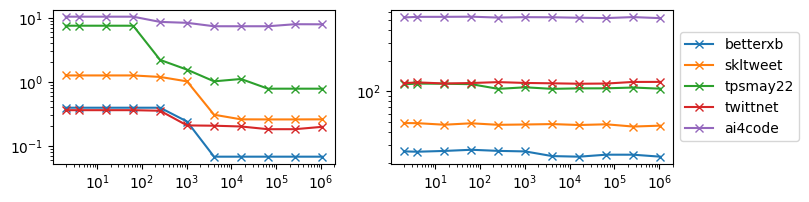

In [19]:
cache_map = [
    ("pgcache0", 2),  # HACK
    ("pgcache4", 4),
    ("pgcache16", 16),
    ("pgcache64", 64),
    ("pgcache256", 256),
    ("pgcache1024", 1024),
    ("pgcache4096", 4096),
    ("pgcache16384", 16384),
    ("pgcache65536", 65536),
    ("pgcache262144", 262144),
    ("pgcache1048576", 1048576),
]
cache_lines = {"cache_size": [cache_size / 1e3 for _, cache_size in cache_map]}
# cache_map = [
#     ("pgcache0", 0.5e6),  # HACK
#     ("pgcache1m", 1e6),
#     ("pgcache15m", 15.625e6),
#     ("pgcache31m", 31.25e6),
#     ("pgcache62m", 62.5e6),
#     ("pgcache125m", 125e6),
#     ("pgcache250m", 250e6),
#     ("pgcache500m", 500e6),
#     ("pgcache1g", 1e9),
#     ("pgcache2g", 2e9),
#     ("pgcache4g", 4e9),
#     ("pgcache8g", 8e9),
#     # ("pgcache10g", 10e9),
#     ("pgcache16g", 16e9),
#     ("pgcache100g", 100e9),
# ]
# cache_lines = {"cache_size": [cache_size / 1e9 for _, cache_size in cache_map]}
fig, axs = plt.subplots(ncols=2, figsize=(8, 2))
for idx in range(len(exp_i_df.nb)):
    nb = exp_i_df.nb[idx]
    xs, ystores, ysaves = [], [], []
    for name, cache_size in cache_map:
        xs.append(cache_size)
        ystores.append(exp_i_df[f"{name}_storage_gb"][idx])
        ysaves.append(exp_i_df[f"{name}_sum_save_s"][idx])
    cache_lines[f"{nb}_storage_gb"] = ystores
    cache_lines[f"{nb}_sum_save_s"] = ysaves
    axs[0].plot(xs, ystores, marker="x", label=nb)
    axs[1].plot(xs, ysaves, marker="x", label=nb)
cache_df = pd.DataFrame(cache_lines)
display(cache_df)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [20]:
cache_df.to_csv("plots/exp_ii_cache.txt", index_label="index", sep=" ")

In [21]:
!cat "plots/exp_ii_cache.txt"

index cache_size betterxb_storage_gb betterxb_sum_save_s skltweet_storage_gb skltweet_sum_save_s tpsmay22_storage_gb tpsmay22_sum_save_s twittnet_storage_gb twittnet_sum_save_s ai4code_storage_gb ai4code_sum_save_s
0 0.002 0.392691814 25.80466604232788 1.252825408 48.89211940765381 7.482720299 117.11501049995422 0.35955717 120.07239294052124 10.351295206 528.9618923664093
1 0.004 0.392691067 25.61507773399353 1.252827548 48.744913816452026 7.482720299 119.05665946006775 0.359556996 122.29501748085022 10.352098299 536.1032025814056
2 0.016 0.392691694 26.06861400604248 1.252827822 47.0976939201355 7.482720299 118.62091016769409 0.359557362 119.35227608680725 10.351549241 536.2702152729034
3 0.064 0.392691577 26.765183687210083 1.252828091 48.623409271240234 7.482720299 117.49017024040222 0.359571162 120.5748062133789 10.351268976 538.2228183746338
4 0.256 0.392694646 26.1035213470459 1.186975724 46.9824116230011 2.189894467 105.69925999641418 0.352240733 123.06593322753906 8.579034829 5

## Partial Loads

In [22]:
suts = [
    "dill",
    "shev",
    "zosp",
    "zodb",
    "pga",
]
nbs = ['betterxb', 'skltweet', 'tpsmay22', 'twittnet', 'ai4code']
rows = []
for nb in nbs:
    for sut in suts:
        result = read_result(all_nb_paths[nb][sut])
        for load in result["loads"]:
            rows.append({
                "nb": nb,
                "sut": sut,
                "tid": load["tid"],
                "time_s": load["time_s"],
            })
pload_df = pd.DataFrame(rows)
pload_df

,nb,sut,tid,time_s
0,betterxb,dill,22,1.168025
1,betterxb,dill,15,1.128165
2,betterxb,dill,9,1.077240
3,betterxb,dill,7,1.095081
4,betterxb,dill,11,1.097190
...,...,...,...,...
2975,ai4code,pga,19,0.332721
2976,ai4code,pga,10,21.335561
2977,ai4code,pga,11,0.041138
2978,ai4code,pga,13,38.258898


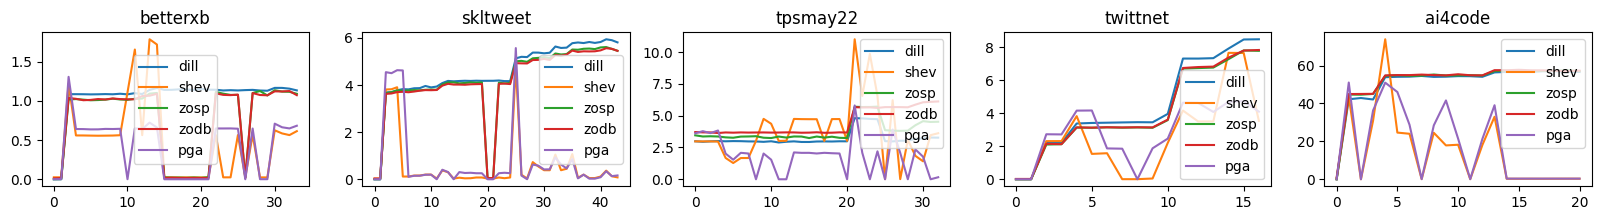

In [23]:
fig, axs = plt.subplots(ncols=5, figsize=(4*5, 2))
result_by_nb = {}
for idx, nb in enumerate(nbs):
    result = pload_df[pload_df["nb"] == nb]
    result = result.groupby(['sut', 'tid'])['time_s'].median().reset_index()
    result = result.pivot_table(index='tid', columns='sut', values='time_s', aggfunc='first').add_suffix('_median_load_s').reset_index()
    result_by_nb[nb] = result
    for sut in suts:
        axs[idx].plot(result.tid, result[f"{sut}_median_load_s"], label=sut)
    axs[idx].legend()
    axs[idx].set_title(nb)
plt.show()

In [24]:
nbssimple = {
    'betterxb': 'betterxb',
    'skltweet': 'skltweet',
    'tpsmay22': 'tpsmay',
    'twittnet': 'twittnet',
    'ai4code': 'aicode',
}
with open("plots/exp_i_ploads.tex", "w") as f:
    for nb in nbs:
        print(nb)
        display(result_by_nb[nb])
        f.write(r"\pgfplotstableread[header=has colnames]{" + "\n")
        f.write(result_by_nb[nb].to_csv(index_label="index", sep=" "))
        f.write("}" + f"\\tableexpipload{nbssimple[nb]}\n")

betterxb


sut,tid,dill_median_load_s,pga_median_load_s,shev_median_load_s,zodb_median_load_s,zosp_median_load_s
0,0,0.000842,0.002014,0.025956,0.011549,0.002023
1,1,0.001600,0.002811,0.025794,0.016003,0.002899
2,2,1.084760,1.305782,1.221139,1.036408,1.017694
3,3,1.084977,0.641076,0.559180,1.025905,1.022554
4,4,1.084159,0.640104,0.558911,1.007883,1.015218
5,5,1.082240,0.636370,0.557137,1.012034,1.007382
6,6,1.083576,0.636814,0.555709,1.022842,1.010328
7,7,1.086101,0.642515,0.556731,1.017411,1.015272
8,8,1.083597,0.641146,0.558025,1.030188,1.027633
9,9,1.090389,0.643715,0.562087,1.022194,1.017640


skltweet


sut,tid,dill_median_load_s,pga_median_load_s,shev_median_load_s,zodb_median_load_s,zosp_median_load_s
0,0,0.000504,0.001529,0.031494,0.030133,0.001379
1,1,0.000516,0.000971,0.031117,0.030177,0.001429
2,2,3.681071,4.543019,3.808641,3.622343,3.659999
3,3,3.696251,4.500297,3.818572,3.639499,3.691025
4,4,3.775778,4.626584,3.903646,3.697869,3.768830
5,5,3.824894,4.616508,0.116674,3.710590,3.757831
6,6,3.813163,0.103165,0.117167,3.692350,3.765600
7,7,3.859657,0.148768,0.157389,3.721179,3.783666
8,8,3.865935,0.151192,0.158729,3.757539,3.772442
9,9,3.957891,0.192964,0.198419,3.782401,3.796501


tpsmay22


sut,tid,dill_median_load_s,pga_median_load_s,shev_median_load_s,zodb_median_load_s,zosp_median_load_s
0,0,2.986881,3.613216,2.979878,3.710430,3.454145
1,1,2.946566,3.779194,2.976997,3.685871,3.362842
2,2,2.981321,3.628313,2.978366,3.682676,3.380563
3,3,3.004483,3.832623,2.962641,3.634629,3.361597
4,4,2.985963,2.018071,1.676861,3.679664,3.293986
5,5,3.001258,1.538427,1.278676,3.661817,3.264027
6,6,2.995147,2.079223,1.669796,3.681343,3.354299
7,7,2.975568,2.026558,1.672194,3.669863,3.364508
8,8,2.971613,0.001503,3.017883,3.676858,3.383660
9,9,2.942840,2.023700,4.748426,3.680300,3.266703


twittnet


sut,tid,dill_median_load_s,pga_median_load_s,shev_median_load_s,zodb_median_load_s,zosp_median_load_s
0,0,0.000556,0.001690,0.006196,0.020682,0.001430
1,1,0.000546,0.001140,0.005750,0.020514,0.001513
2,2,2.206746,2.724630,2.308240,2.150159,2.100223
3,3,2.204653,2.715116,2.310343,2.123679,2.122905
4,4,3.375464,4.154549,3.821113,3.140630,3.128776
5,5,3.408688,4.162509,1.536266,3.123598,3.118096
6,6,3.423949,1.867503,1.576771,3.147054,3.144860
7,7,3.440083,1.851513,0.006498,3.135320,3.123879
8,8,3.455085,0.002521,0.006752,3.147247,3.139198
9,9,3.448126,1.875425,0.047521,3.139216,3.117942


ai4code


sut,tid,dill_median_load_s,pga_median_load_s,shev_median_load_s,zodb_median_load_s,zosp_median_load_s
0,0,0.000871,0.002226,0.012523,0.840623,0.002030
1,1,42.207088,51.043780,43.584301,44.970393,44.696444
2,2,42.870801,0.001592,0.011814,45.015513,44.627325
3,3,42.102352,36.291888,30.961754,45.084976,45.030279
4,4,53.865982,50.975182,73.862638,54.802521,54.559737
5,5,54.064431,46.032209,24.631694,54.967261,54.942186
6,6,54.141901,28.765637,24.011864,54.960904,54.605020
7,7,54.523103,0.052305,0.088935,55.232834,54.679623
8,8,54.019503,28.447759,24.532017,54.967109,55.268124
9,9,54.122297,41.600051,17.868030,54.827756,54.749403


In [25]:
!cat plots/exp_i_ploads.tex

\pgfplotstableread[header=has colnames]{
index tid dill_median_load_s pga_median_load_s shev_median_load_s zodb_median_load_s zosp_median_load_s
0 0 0.0008416175842285156 0.00201416015625 0.025956034660339355 0.01154935359954834 0.00202333927154541
1 1 0.0015996694564819336 0.002810955047607422 0.025793910026550293 0.016002893447875977 0.002898573875427246
2 2 1.084760069847107 1.3057817220687866 1.2211391925811768 1.0364081859588623 1.0176942348480225
3 3 1.084977388381958 0.6410764455795288 0.5591796636581421 1.0259054899215698 1.0225541591644287
4 4 1.0841591358184814 0.6401042938232422 0.5589114427566528 1.0078829526901245 1.015217900276184
5 5 1.082240343093872 0.6363704204559326 0.5571370124816895 1.0120338201522827 1.0073822736740112
6 6 1.0835762023925781 0.6368142366409302 0.5557087659835815 1.0228419303894043 1.010327935218811
7 7 1.0861011743545532 0.6425145864486694 0.5567307472229004 1.0174109935760498 1.0152721405029297
8 8 1.0835965871810913 0.6411464214324951 0.55802488

## Wait vs. Perceived Delay Time

In [26]:
suts = [
    "dill",
    "shev",
    "zosp",
    "zodb",
    "pglnoavlstatic",
    "pgnoavlstatic",
    "pgnostatic",
    # "pgl",
    "pgnoavl",
    "pga",
]
nbs = ['betterxb', 'skltweet', 'tpsmay22', 'twittnet', 'ai4code']
rows = []
for nb in nbs:
    baseline_result = read_result(all_nb_paths[nb]["snp"])  # Pure exec time without locking.
    baseline_exec_times = baseline_result["exec_times"]
    for sut in suts:
        result = read_result(all_nb_paths[nb][sut])
        assert len(result["exec_times"]) == len(baseline_exec_times)
        for idx, exec_time in enumerate(result["exec_times"]):
            dump_time = result["dumps"][idx]["time_s"]
            join_time = 0 if idx <= 0 or idx > len(result["join_times"]) else result["join_times"][idx - 1]  # Shifted
            async_time = 0 if idx >= len(result["async_dumps"]) else result["async_dumps"][idx]["time_s"]
            lock_time = max(exec_time - baseline_exec_times[idx], 0)
            # lock_time = 0 if idx >= len(result["lock_times"]) else result["lock_times"][idx]  # This is not aligned.
            rows.append({
                "nb": nb,
                "sut": sut,
                "sync_time": max(dump_time - join_time, 0),
                "async_time": async_time,
                "lock_time": lock_time,
                "dump_time": dump_time,
            })
async_df = pd.DataFrame(rows)
async_df

,nb,sut,sync_time,async_time,lock_time,dump_time
0,betterxb,dill,0.000890,0.000000,0.010626,0.000890
1,betterxb,dill,0.002483,0.000000,0.020813,0.002483
2,betterxb,dill,1.824522,0.000000,0.051347,1.824522
3,betterxb,dill,1.841788,0.000000,0.007995,1.841788
4,betterxb,dill,1.837776,0.000000,0.110098,1.837776
...,...,...,...,...,...,...
1336,ai4code,pga,0.000831,1.034599,0.000000,0.000854
1337,ai4code,pga,0.000593,0.003474,0.001058,1.001967
1338,ai4code,pga,0.000794,1.049424,0.000000,0.000816
1339,ai4code,pga,0.000744,0.940001,1.030746,0.026489


In [27]:
save_s_final = 600
delay_df_by_nbsut = {}
for nb in nbs:
    df = async_df[async_df["nb"] == nb]
    delay_df_by_nbsut[nb] = {}
    for sut in suts:
        sut_df = df[df["sut"] == sut]
        sut_baseline = df[df["sut"] == "pga"]
        save_times = (
            np.array(sut_df["dump_time"])
            + np.array(sut_df["lock_time"])
            # + np.array(sut_df["sync_time"])
            # + np.array(sut_df["async_time"])
        )
        delay_rows = [{"save_s": ts, "ecdf": ecdf * 100} for ts, ecdf in zip(np.sort(save_times), 1.0 / len(save_times) + np.linspace(0, 1, len(save_times), endpoint=False))]
        # delay_rows.append({"save_s": save_s_final, "ecdf": 100})
        delay_df_by_nbsut[nb][sut] = pd.DataFrame(delay_rows)

In [28]:
nbssimple = {
    'betterxb': 'betterxb',
    'skltweet': 'skltweet',
    'tpsmay22': 'tpsmay',
    'twittnet': 'twittnet',
    'ai4code': 'aicode',
}
with open("plots/exp_iv_ecdf.tex", "w") as f:
    for nb in nbs:
        for sut in suts:
            print(nb, sut, max(delay_df_by_nbsut[nb][sut]["save_s"]))
            # display(delay_df_by_nbsut[nb][sut])
            f.write(r"\pgfplotstableread[header=has colnames]{" + "\n")
            f.write(delay_df_by_nbsut[nb][sut].to_csv(index_label="index", sep=" "))
            f.write("}" + f"\\tableexpivecdf{nbssimple[nb]}{sut}\n")

betterxb dill 1.9478740692138672
betterxb shev 12.727883338928223
betterxb zosp 4.28360390663147
betterxb zodb 8.114066362380981
betterxb pglnoavlstatic 5.8615124225616455
betterxb pgnoavlstatic 5.377116441726685
betterxb pgnostatic 4.291438817977905
betterxb pgnoavl 4.504930734634399
betterxb pga 9.1622314453125
skltweet dill 10.816457986831665
skltweet shev 22.39234495162964
skltweet zosp 12.226685762405396
skltweet zodb 12.130414247512817
skltweet pglnoavlstatic 15.508275508880615
skltweet pgnoavlstatic 13.610987186431885
skltweet pgnostatic 14.306886911392212
skltweet pgnoavl 14.30027151107788
skltweet pga 14.335494041442871
tpsmay22 dill 9.098142385482788
tpsmay22 shev 81.20197582244873
tpsmay22 zosp 16.35044026374817
tpsmay22 zodb 21.14124846458435
tpsmay22 pglnoavlstatic 15.695613861083984
tpsmay22 pgnoavlstatic 14.632344484329224
tpsmay22 pgnostatic 14.277710199356079
tpsmay22 pgnoavl 14.559430122375488
tpsmay22 pga 14.667013168334961
twittnet dill 17.83497929573059
twittnet sh

In [29]:
!cat plots/exp_iv_ecdf.tex

\pgfplotstableread[header=has colnames]{
index save_s ecdf
0 0.011516809463500977 2.941176470588235
1 0.023296117782592773 5.88235294117647
2 1.8458960056304932 8.823529411764705
3 1.8489735126495361 11.76470588235294
4 1.849782943725586 14.705882352941178
5 1.854945182800293 17.647058823529413
6 1.8664958477020264 20.588235294117645
7 1.8731720447540283 23.52941176470588
8 1.8744769096374512 26.47058823529412
9 1.8758692741394043 29.411764705882355
10 1.8776986598968506 32.35294117647059
11 1.8821096420288086 35.294117647058826
12 1.8826353549957275 38.23529411764706
13 1.8846662044525146 41.17647058823529
14 1.8871018886566162 44.11764705882353
15 1.8900797367095947 47.05882352941176
16 1.8934009075164795 50.0
17 1.8964197635650635 52.94117647058824
18 1.8972752094268799 55.88235294117647
19 1.898430347442627 58.82352941176471
20 1.8998489379882812 61.76470588235294
21 1.9005975723266602 64.70588235294117
22 1.9010839462280273 67.64705882352942
23 1.9012608528137207 70.58823529411765

In [30]:
# wait_ts = sorted(set(async_df["async_time"]))
delay_df_by_nb = {}
for nb in nbs:
    df = async_df[async_df["nb"] == nb]
    wait_ts = sorted(set(df["async_time"]))
    delay_rows = []
    for wait_t in wait_ts:
        delay_by_sut = {"wait_s": wait_t}
        for sut in suts:
            sut_df = df[df["sut"] == sut]
            sync_times = sut_df["sync_time"]
            async_times = sut_df["async_time"]
            delay_async_time = np.clip(async_times - wait_t, 0, None)
            delay_by_sut[f"{sut}_avg_delay_s"] = (sync_times.sum() + delay_async_time.sum()) / len(sync_times)
        delay_rows.append(delay_by_sut)
    delay_df = pd.DataFrame(delay_rows)
    delay_df_by_nb[nb] = delay_df

In [31]:
nbssimple = {
    'betterxb': 'betterxb',
    'skltweet': 'skltweet',
    'tpsmay22': 'tpsmay',
    'twittnet': 'twittnet',
    'ai4code': 'aicode',
}
with open("plots/exp_iv_waits.tex", "w") as f:
    for nb in nbs:
        print(nb)
        display(delay_df_by_nb[nb])
        f.write(r"\pgfplotstableread[header=has colnames]{" + "\n")
        f.write(delay_df_by_nb[nb].to_csv(index_label="index", sep=" "))
        f.write("}" + f"\\tableexpivwait{nbssimple[nb]}\n")

betterxb


,wait_s,dill_avg_delay_s,shev_avg_delay_s,zosp_avg_delay_s,zodb_avg_delay_s,pglnoavlstatic_avg_delay_s,pgnoavlstatic_avg_delay_s,pgnostatic_avg_delay_s,pgnoavl_avg_delay_s,pga_avg_delay_s
0,0.000000,1.774972,8.570363,2.071273,2.034574,1.123441,1.109413,1.116416,0.844352,0.847860
1,0.002877,1.774972,8.570363,2.071273,2.034574,1.123441,1.106537,1.113539,0.841475,0.844983
2,0.003012,1.774972,8.570363,2.071273,2.034574,1.123441,1.106405,1.113403,0.841339,0.844848
3,0.003101,1.774972,8.570363,2.071273,2.034574,1.123441,1.106321,1.113314,0.841250,0.844758
4,0.003131,1.774972,8.570363,2.071273,2.034574,1.123441,1.106294,1.113285,0.841221,0.844729
...,...,...,...,...,...,...,...,...,...,...
132,2.454577,1.774972,8.570363,2.071273,2.034574,1.123441,0.030367,0.032164,0.030789,0.030015
133,3.448026,1.774972,8.570363,2.071273,2.034574,1.123441,0.001148,0.002945,0.001570,0.000796
134,3.460249,1.774972,8.570363,2.071273,2.034574,1.123441,0.000789,0.002586,0.001210,0.000796
135,3.474673,1.774972,8.570363,2.071273,2.034574,1.123441,0.000789,0.002161,0.000786,0.000796


skltweet


,wait_s,dill_avg_delay_s,shev_avg_delay_s,zosp_avg_delay_s,zodb_avg_delay_s,pglnoavlstatic_avg_delay_s,pgnoavlstatic_avg_delay_s,pgnostatic_avg_delay_s,pgnoavl_avg_delay_s,pga_avg_delay_s
0,0.000000,8.04166,16.296566,9.117465,9.078055,1.640334,1.660509,1.692828,1.351786,1.385231
1,0.002979,8.04166,16.296566,9.117465,9.078055,1.640334,1.657530,1.689849,1.348807,1.382252
2,0.003168,8.04166,16.296566,9.117465,9.078055,1.640334,1.657341,1.689660,1.348622,1.382063
3,0.003270,8.04166,16.296566,9.117465,9.078055,1.640334,1.657239,1.689558,1.348522,1.381963
4,0.003282,8.04166,16.296566,9.117465,9.078055,1.640334,1.657226,1.689545,1.348511,1.381951
...,...,...,...,...,...,...,...,...,...,...
172,10.128653,8.04166,16.296566,9.117465,9.078055,1.640334,0.069133,0.076615,0.066247,0.071574
173,13.009974,8.04166,16.296566,9.117465,9.078055,1.640334,0.003648,0.011131,0.000762,0.006090
174,13.137819,8.04166,16.296566,9.117465,9.078055,1.640334,0.000742,0.008225,0.000762,0.003184
175,13.241638,8.04166,16.296566,9.117465,9.078055,1.640334,0.000742,0.005866,0.000762,0.000824


tpsmay22


,wait_s,dill_avg_delay_s,shev_avg_delay_s,zosp_avg_delay_s,zodb_avg_delay_s,pglnoavlstatic_avg_delay_s,pgnoavlstatic_avg_delay_s,pgnostatic_avg_delay_s,pgnoavl_avg_delay_s,pga_avg_delay_s
0,0.000000,5.665006,35.632886,8.204904,9.111983,3.935287,4.049829,3.969412,3.633488,3.683400
1,0.003568,5.665006,35.632886,8.204904,9.111983,3.935287,4.046260,3.965843,3.629920,3.679832
2,0.003643,5.665006,35.632886,8.204904,9.111983,3.935287,4.046186,3.965769,3.629848,3.679757
3,0.004016,5.665006,35.632886,8.204904,9.111983,3.935287,4.045813,3.965396,3.629486,3.679396
4,0.004058,5.665006,35.632886,8.204904,9.111983,3.935287,4.045771,3.965354,3.629446,3.679356
...,...,...,...,...,...,...,...,...,...,...
128,12.609971,5.665006,35.632886,8.204904,9.111983,3.935287,0.072199,0.061186,0.072831,0.073285
129,14.598117,5.665006,35.632886,8.204904,9.111983,3.935287,0.011952,0.000939,0.012585,0.013038
130,14.961076,5.665006,35.632886,8.204904,9.111983,3.935287,0.000954,0.000939,0.001586,0.002039
131,14.983576,5.665006,35.632886,8.204904,9.111983,3.935287,0.000954,0.000939,0.000904,0.001358


twittnet


,wait_s,dill_avg_delay_s,shev_avg_delay_s,zosp_avg_delay_s,zodb_avg_delay_s,pglnoavlstatic_avg_delay_s,pgnoavlstatic_avg_delay_s,pgnostatic_avg_delay_s,pgnoavl_avg_delay_s,pga_avg_delay_s
0,0.000000,8.74633,20.549819,10.14269,9.943793,9.224569,9.351095,9.316320,7.858956,8.142880
1,0.002661,8.74633,20.549819,10.14269,9.943793,9.224569,9.348434,9.313659,7.856295,8.140219
2,0.003258,8.74633,20.549819,10.14269,9.943793,9.224569,9.347838,9.313062,7.855734,8.139622
3,0.003323,8.74633,20.549819,10.14269,9.943793,9.224569,9.347772,9.312997,7.855672,8.139561
4,0.003445,8.74633,20.549819,10.14269,9.943793,9.224569,9.347650,9.312875,7.855564,8.139446
...,...,...,...,...,...,...,...,...,...,...
64,20.821134,8.74633,20.549819,10.14269,9.943793,9.224569,0.637239,0.616638,0.672707,0.736227
65,31.290529,8.74633,20.549819,10.14269,9.943793,9.224569,0.021392,0.000791,0.056861,0.120380
66,31.641708,8.74633,20.549819,10.14269,9.943793,9.224569,0.000735,0.000791,0.036203,0.099722
67,32.244265,8.74633,20.549819,10.14269,9.943793,9.224569,0.000735,0.000791,0.000759,0.064278


ai4code


,wait_s,dill_avg_delay_s,shev_avg_delay_s,zosp_avg_delay_s,zodb_avg_delay_s,pglnoavlstatic_avg_delay_s,pgnoavlstatic_avg_delay_s,pgnostatic_avg_delay_s,pgnoavl_avg_delay_s,pga_avg_delay_s
0,0.000000,97.640227,241.561972,112.254431,112.356144,38.115311,38.620962,37.509969,29.752431,28.322721
1,0.003474,97.640227,241.561972,112.254431,112.356144,38.115311,38.617488,37.506496,29.748957,28.319248
2,0.003490,97.640227,241.561972,112.254431,112.356144,38.115311,38.617471,37.506479,29.748940,28.319231
3,0.003577,97.640227,241.561972,112.254431,112.356144,38.115311,38.617385,37.506393,29.748858,28.319149
4,0.003582,97.640227,241.561972,112.254431,112.356144,38.115311,38.617380,37.506388,29.748854,28.319145
...,...,...,...,...,...,...,...,...,...,...
80,120.157173,97.640227,241.561972,112.254431,112.356144,38.115311,1.142152,0.987240,1.246494,1.052554
81,140.871333,97.640227,241.561972,112.254431,112.356144,38.115311,0.155763,0.000851,0.260105,0.066165
82,142.239654,97.640227,241.561972,112.254431,112.356144,38.115311,0.090605,0.000851,0.194947,0.001007
83,144.124614,97.640227,241.561972,112.254431,112.356144,38.115311,0.000845,0.000851,0.105187,0.001007


In [32]:
!cat plots/exp_iv_waits.tex

\pgfplotstableread[header=has colnames]{
index wait_s dill_avg_delay_s shev_avg_delay_s zosp_avg_delay_s zodb_avg_delay_s pglnoavlstatic_avg_delay_s pgnoavlstatic_avg_delay_s pgnostatic_avg_delay_s pgnoavl_avg_delay_s pga_avg_delay_s
0 0.0 1.7749723266152775 8.570363409378949 2.0712734250461353 2.0345744876300587 1.1234409738989437 1.109413273194257 1.1164156408870922 0.8443516703212962 0.8478598384296193
1 0.0028765201568603516 1.7749723266152775 8.570363409378949 2.0712734250461353 2.0345744876300587 1.1234409738989437 1.1065367530373966 1.1135391207302319 0.8414751501644359 0.844983318272759
2 0.0030121803283691406 1.7749723266152775 8.570363409378949 2.0712734250461353 2.0345744876300587 1.1234409738989437 1.1064050828709322 1.113403460558723 0.8413394899929271 0.8448476581012502
3 0.003101348876953125 1.7749723266152775 8.570363409378949 2.0712734250461353 2.0345744876300587 1.1234409738989437 1.1063211595310884 1.113314292010139 0.8412503214443431 0.8447584895526662
4 0.003130912